<a href="https://www.kaggle.com/rajnishkumar546/sms-detection?scriptVersionId=87927208" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding="ISO-8859-1")

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.shape

(5572, 5)

In [7]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [8]:
##DAta Cleaning

In [9]:
df.drop(columns= ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [10]:
df.rename(columns = {'v1' : 'target', 'v2' : 'text'}, inplace = True)

In [11]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
df.duplicated().sum()

403

In [17]:
df = df.drop_duplicates(keep = 'first')

In [18]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [19]:
import seaborn as sns

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='target', ylabel='count'>

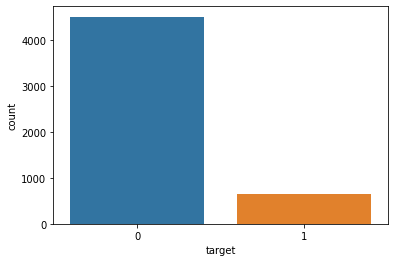

In [20]:
sns.countplot(df['target'], data = df)

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['number_char'] = df['text'].apply(len)

In [24]:
df['number_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [25]:
df.head()

,target,text,number_char,number_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
df['number_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [27]:
df.head()

,target,text,number_char,number_words,number_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df.describe()

,target,number_char,number_words,number_sentence
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.286129,1.961308
std,0.332253,58.236293,13.226400,1.432583
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,219.000000,38.000000


In [29]:
df[df['target'] == 0].describe()

,target,number_char,number_words,number_sentence
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,16.957484,1.815545
std,0.0,56.358207,13.394052,1.364098
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,219.000000,38.000000


In [30]:
df[df['target'] == 1].describe()

,target,number_char,number_words,number_sentence
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.474732,2.969372
std,0.0,30.137753,6.893007,1.488910
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,44.000000,9.000000


<AxesSubplot:xlabel='number_words', ylabel='Count'>

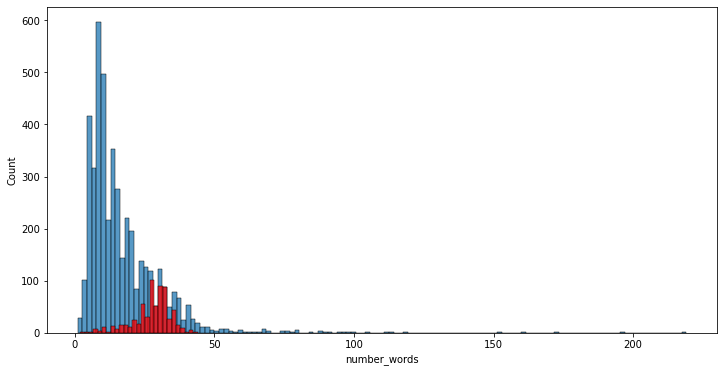

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['number_words'])
sns.histplot(df[df['target'] == 1]['number_words'], color = 'red')


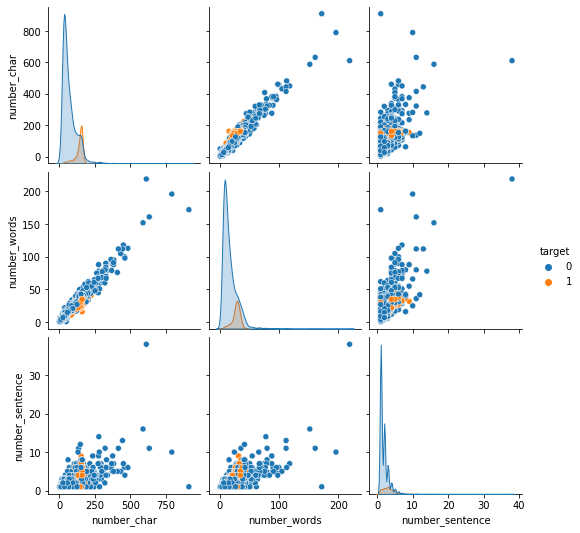

In [32]:
sns.pairplot(df, hue = 'target')

<AxesSubplot:>

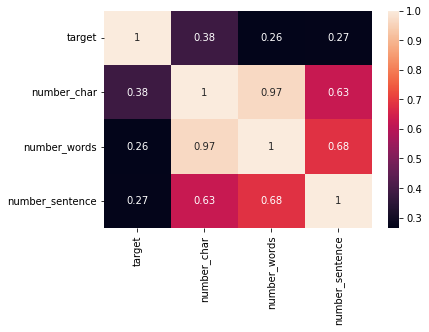

In [33]:
sns.heatmap(df.corr(), annot= True)

In [34]:
from nltk.corpus import stopwords
len(stopwords.words('english'))

179

In [35]:
import string

In [36]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [37]:
def transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]#copying list
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [38]:
df['transform_text'] = df['text'].apply(transform)

In [39]:
df.head()

,target,text,number_char,number_words,number_sentence,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [40]:
from wordcloud import WordCloud

In [41]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color='white')

In [42]:
spam_wordcloud = wc.generate(df[df['target'] == 1]['transform_text'].str.cat(sep = " "))

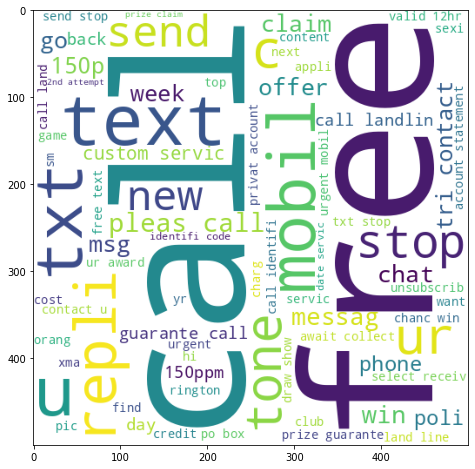

In [43]:
plt.figure(figsize=(15,8))
plt.imshow(spam_wordcloud)

In [44]:
spam_wordcloud = wc.generate(df[df['target'] == 0]['transform_text'].str.cat(sep = " "))

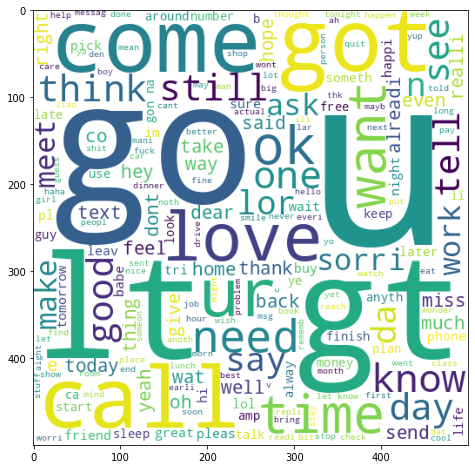

In [45]:
plt.figure(figsize=(15,8))
plt.imshow(spam_wordcloud)

**Model**

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [47]:
X = cv.fit_transform(df['transform_text']).toarray()

In [48]:
X.shape

(5169, 6629)

In [49]:
y = df['target'].values

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [53]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [54]:
from sklearn.metrics import classification_report

In [55]:
gnb.fit(X_train, y_train)
pred1 = gnb.predict(X_test)

In [56]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91       889
           1       0.50      0.87      0.63       145

    accuracy                           0.86      1034
   macro avg       0.74      0.86      0.77      1034
weighted avg       0.91      0.86      0.87      1034



In [57]:
mnb.fit(X_train, y_train)
pred2 = mnb.predict(X_test)
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       889
           1       0.89      0.92      0.91       145

    accuracy                           0.97      1034
   macro avg       0.94      0.95      0.94      1034
weighted avg       0.97      0.97      0.97      1034



In [58]:
bnb.fit(X_train, y_train)
pred3 = bnb.predict(X_test)
print(classification_report(y_test, pred3))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       0.97      0.79      0.87       145

    accuracy                           0.97      1034
   macro avg       0.97      0.89      0.92      1034
weighted avg       0.97      0.97      0.96      1034



**We can use pipeline to predict in one step**

In [59]:
X = df['text']
y = df['target']

In [60]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
from sklearn.pipeline import Pipeline

In [62]:
from sklearn.svm import LinearSVC

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [64]:
text_clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [65]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [66]:
prediction = text_clf.predict(X_test)

In [67]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       889
           1       0.98      0.92      0.95       145

    accuracy                           0.99      1034
   macro avg       0.98      0.96      0.97      1034
weighted avg       0.99      0.99      0.99      1034

